<a href="https://colab.research.google.com/github/HarmanBhutani/ML_projects/blob/main/Assignment4_PartA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<H1 align="center"><b> Assignment 4 - Part A</b></H1>

<H1 align="center"><b> By: Harman Bhutani - 300144160 </b></H1>

<H5 align="left"><b> Overview:</b></H5>
<p align="justify">This assignment should be completed individually using either Python or R. Upon completion, present your result in one submission, including the report, answers generated and plots. Also, submit the source codes used to generate your results as a separate attachment.</p>
<H5 align="left"><b>Part A: Topic Modeling & Sentiment Analysis</b></H5>

<p align="justify"> Sentiment analysis is useful for identifying attitudes in text data about a subject of interest. It is scored using polarity
values that range from 1 (i.e., more positivity) to -1 (i.e., more negativity). In this part, you will:
<ol>

<li>Estimate the public's perception of natural hazards using tweets from the tornado dataset provided</li>
<li>Develop a text summarizer</li>


In [23]:
pip install contractions

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import re
import contractions
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import gensim
from gensim import corpora
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MultiLabelBinarizer
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns

In [5]:
df_tor = pd.read_excel('Tornado.xlsx', header=None)

In [6]:
df_tor

,0,1,2,3,4,5,6,7,8,9,10
0,0\tRT @uberdogfound: Please RT - Food needed f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1\tPlease RT - Food needed for shelter in NC i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3\t‚ô°its raining and tornado warnings....abou...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9\tLmao #damn RT @LuCeCaNNoNn: If I don't get ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10\tSaved by the tornado warning....I'm just r...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3626,39\tThanks to @BarackObama and @SethMeyers21 f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3627,0\tStamford-based AmeriCares is preparing to s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3628,"2\t""Semi-trailer parked at People's Church Spr...",leaves 2pm Sun. Need water food batteries bla...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3629,3\tRT @TopNoTcH_B1tch: My mom is goin out of t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_tor=df_tor.fillna('')

In [8]:
df_tor=df_tor.astype(str)

In [9]:
df_tor.head().apply(lambda x: ''.join(x), axis=1)

0    0\tRT @uberdogfound: Please RT - Food needed f...
1    1\tPlease RT - Food needed for shelter in NC i...
2    3\t‚ô°its raining and tornado warnings....abou...
3    9\tLmao #damn RT @LuCeCaNNoNn: If I don't get ...
4    10\tSaved by the tornado warning....I'm just r...
dtype: object

In [10]:
df_tor.shape

(3631, 11)

In [11]:
df_tor.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0\tRT @uberdogfound: Please RT - Food needed f...,,,,,,,,,,
1,1\tPlease RT - Food needed for shelter in NC i...,,,,,,,,,,
2,3\t‚ô°its raining and tornado warnings....abou...,,,,,,,,,,
3,9\tLmao #damn RT @LuCeCaNNoNn: If I don't get ...,,,,,,,,,,
4,10\tSaved by the tornado warning....I'm just r...,,,,,,,,,,


In [12]:
for text in df_tor[0].head():
    print(text)

0	RT @uberdogfound: Please RT - Food needed for shelter in NC in area that was hit hard by tornado. Please contact us at…	40657.975
1	Please RT - Food needed for shelter in NC in area that was hit hard by tornado.  Please contact us at info@uberdogfoundation.org to help!	40657.975
3	‚ô°its raining and tornado warnings....about to be in a coma from eating all this food in a few!!!‚òª‚òª	40657.89792
9	Lmao #damn RT @LuCeCaNNoNn: If I don't get any food I hope the tornado blow all yall food out yall mouth #SoIDC	40657.76667
10	Saved by the tornado warning....I'm just ready to eat this good food	40657.75625


1. Using the textblob package in python, calculate a polarity value for each tweet (10 points)

In [13]:
sentiment_ob = [TextBlob(text) for text in df_tor[0]]

In [14]:
polarity = [sen.sentiment.polarity for sen in sentiment_ob]

Plot the polarity values in a histogram to identify the overall sentiment (10 points)

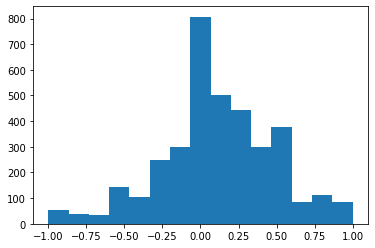

In [15]:
plt.hist(polarity, bins=15)
plt.show()

A.3

What does the histogram of polarity values tell you about sentiments in the tweets? Are they positive or
negative?

Values closer to 1 indicate more positivity, while values closer to -1 indicate more negativity.The number of tweets less than 0 are the negative tweets and on other side are considered as positive tweets.Considering 0 as the neutral value which is having highest value as shown in the above histogram . Since the total of values of histogram to the right of 0 are much more than in the left which means that they are much more positive sentiments in the tweets

Part B

Preprocess the tweets & compute frequency distribution for most common 10 words

In [16]:
df_tor[0] = [re.sub(r'@\w+|http\S+|www\S+|#\S+',"",line.lower()) for line in df_tor[0]]

In [17]:
punc = set([word for line in df_tor[0] for word in line if not word.isalnum()])
punc.remove(' ')
punc.remove("'")
remove = '|'.join('\\'+i for i in punc)

In [18]:
df_tor[0] = df_tor[0].apply(lambda x: re.sub(remove, '', x))

In [19]:
for text in df_tor[0].head():
    print(text)

0rt  please rt  food needed for shelter in nc in area that was hit hard by tornado please contact us at40657975
1please rt  food needed for shelter in nc in area that was hit hard by tornado  please contact us at infoorg to help40657975
3ôits raining and tornado warningsabout to be in a coma from eating all this food in a fewòªòª4065789792
9lmao  rt  if i don't get any food i hope the tornado blow all yall food out yall mouth 4065776667
10saved by the tornado warningi'm just ready to eat this good food4065775625


In [26]:
d = contractions.contractions_dict

In [27]:
df_tor[0] = df_tor[0].apply(lambda x: ' '.join([d[wor] if wor in d.keys() else wor for wor in x.split()]))

In [28]:
for text in df_tor[0].head():
    print(text)

0rt please rt food needed for shelter in nc in area that was hit hard by tornado please contact us at40657975
1please rt food needed for shelter in nc in area that was hit hard by tornado please contact us at infoorg to help40657975
3ôits raining and tornado warningsabout to be in a coma from eating all this food in a fewòªòª4065789792
9lmao rt if i do not get any food i hope the tornado blow all yall food out yall mouth 4065776667
10saved by the tornado warningi'm just ready to eat this good food4065775625


In [33]:
st_words = set(stopwords.words('english'))

In [34]:
df_tor[0] = df_tor[0].apply(lambda x: [word for word in x.split() if word not in st_words])

In [35]:
for text in df_tor[0].head():
    print(text)

['0rt', 'please', 'rt', 'food', 'needed', 'shelter', 'nc', 'area', 'hit', 'hard', 'tornado', 'please', 'contact', 'us', 'at40657975']
['1please', 'rt', 'food', 'needed', 'shelter', 'nc', 'area', 'hit', 'hard', 'tornado', 'please', 'contact', 'us', 'infoorg', 'help40657975']
['3ôits', 'raining', 'tornado', 'warningsabout', 'coma', 'eating', 'food', 'fewòªòª4065789792']
['9lmao', 'rt', 'get', 'food', 'hope', 'tornado', 'blow', 'yall', 'food', 'yall', 'mouth', '4065776667']
['10saved', 'tornado', "warningi'm", 'ready', 'eat', 'good', 'food4065775625']


In [36]:
wnl = WordNetLemmatizer()

In [37]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [38]:
df_tor[0] = df_tor[0].apply(lambda x: [wnl.lemmatize(word) for word in x])

In [39]:
for text in df_tor[0].head():
    print(text)

['0rt', 'please', 'rt', 'food', 'needed', 'shelter', 'nc', 'area', 'hit', 'hard', 'tornado', 'please', 'contact', 'u', 'at40657975']
['1please', 'rt', 'food', 'needed', 'shelter', 'nc', 'area', 'hit', 'hard', 'tornado', 'please', 'contact', 'u', 'infoorg', 'help40657975']
['3ôits', 'raining', 'tornado', 'warningsabout', 'coma', 'eating', 'food', 'fewòªòª4065789792']
['9lmao', 'rt', 'get', 'food', 'hope', 'tornado', 'blow', 'yall', 'food', 'yall', 'mouth', '4065776667']
['10saved', 'tornado', "warningi'm", 'ready', 'eat', 'good', 'food4065775625']


In [40]:
df_tor[0].str.split(expand=True).stack().value_counts()

Series([], dtype: int64)

In [41]:
tweets_lemmatize_values = ','.join([item for sub_list in df_tor[0] for item in sub_list])

In [42]:
from collections import Counter  

In [43]:
from spacy.lang.en import English

In [44]:
nlp = English()

In [45]:
nlp.max_length = 40000000

In [47]:
tweets_lemmatize_inter = nlp(tweets_lemmatize_values)


tweets_lemmatize_inter1 = [token.text for token in tweets_lemmatize_inter if token.is_punct != True]


all_word_freq = Counter(tweets_lemmatize_inter1)


top_ten_words = all_word_freq.most_common(10)
top_ten_words

[('tornado', 2381),
 ('shelter', 843),
 ('car', 740),
 ('warning', 416),
 ('food', 320),
 ('rt', 283),
 ('take', 282),
 ('seek', 232),
 ('ride', 212),
 ('get', 209)]

In [48]:
frequency_data = pd.DataFrame.from_dict(all_word_freq, orient='index').reset_index()
frequency_data.columns=["word", "frequency"]

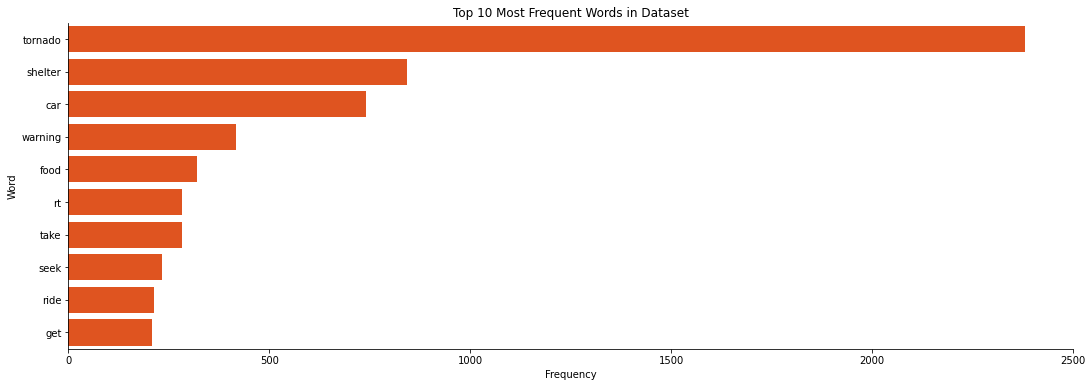

In [50]:
fig, ax = plt.subplots(figsize=(18,6))
sns.barplot(data=frequency_data.sort_values(by="frequency", ascending=False).head(10), 
            y="word", 
            x="frequency", 
            color='#FF4500')
plt.ylabel("Word")
plt.xlabel("Frequency")
plt.title("Top 10 Most Frequent Words in Dataset")
sns.despine();

Create a topic model using the LDA approach & extract 10 meaningful topics (15 points)

In [51]:
dictionary = corpora.Dictionary(df_tor[0].tolist())

In [52]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df_tor[0]]

In [53]:
lda = gensim.models.ldamodel.LdaModel

In [59]:
lda_model = lda(doc_term_matrix, num_topics=10, id2word=dictionary, passes=5)

In [60]:
print(lda_model.print_topics())

[(0, '0.049*"tornado" + 0.042*"car" + 0.012*"right" + 0.011*"go" + 0.010*"shelter" + 0.007*"st" + 0.007*"home" + 0.006*"louis" + 0.006*"still" + 0.006*"watch"'), (1, '0.061*"tornado" + 0.056*"ride" + 0.019*"car" + 0.015*"shelter" + 0.012*"go" + 0.012*"safe" + 0.011*"rt" + 0.010*"place" + 0.010*"warning" + 0.010*"like"'), (2, '0.031*"tornado" + 0.014*"damage" + 0.009*"would" + 0.008*"birmingham" + 0.008*"downtown" + 0.007*"back" + 0.006*"rt" + 0.005*"food" + 0.005*"resident" + 0.005*"really"'), (3, '0.041*"tornado" + 0.015*"shelter" + 0.009*"survive" + 0.009*"as" + 0.008*"tree" + 0.006*"two" + 0.006*"warning" + 0.005*"damn" + 0.005*"love" + 0.005*"find"'), (4, '0.068*"tornado" + 0.036*"car" + 0.024*"shelter" + 0.022*"warning" + 0.009*"get" + 0.009*"part" + 0.009*"seek" + 0.008*"nw" + 0.008*"food" + 0.007*"2"'), (5, '0.049*"tornado" + 0.045*"car" + 0.013*"take" + 0.013*"shelter" + 0.007*"side" + 0.007*"warning" + 0.006*"u" + 0.006*"i\'m" + 0.006*"shit" + 0.006*"old"'), (6, '0.049*"tornad